##### Module 5- Other Forms of Visualization
author: Radley Rigonan

In this module, I will be desmonstrating a few other graphical capabilities in Python.  As of July 2016, this module contains examples for a pie-chart and a table.
I will be using the following link to create a table and pi chart:
https://radwatch.berkeley.edu/sites/default/files/pictures/rooftop_tmp/weather.csv

This module is also the first time I will use numpy.  Numpy provides functions that perform common numerical techniques such as mean, median, and mode.  It aleo enables multi-dimensional data arrays: allowing Python to deal with vector computation, matrix arithmetic, and a variety of other numerical manipulations.

In [1]:
%matplotlib inline
import csv
import io
import urllib.request            
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np  

url = 'https://radwatch.berkeley.edu/sites/default/files/pictures/rooftop_tmp/weather.csv' 
response = urllib.request.urlopen(url)
reader = csv.reader(io.TextIOWrapper(response)) 
timedata = []
Bi214 = []
K40 = []
Cs134 = []
Cs137 = []
line = 0

for row in reader:
    if line != 0:
        timedata.append(datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S'))
        Bi214.append(float(row[1]))
        K40.append(float(row[2]))
        Cs134.append(float(row[3]))
        Cs137.append(float(row[4]))
    line += 1

The following module creates a pi chart that illustrates the breakdown of which isotope is measured to have the highest concentration during the given interval of our data.

In order to do this, we start with an for-loop script that tallies which isotope has the highest concentration measurement at each index until it reaches the end of the data:

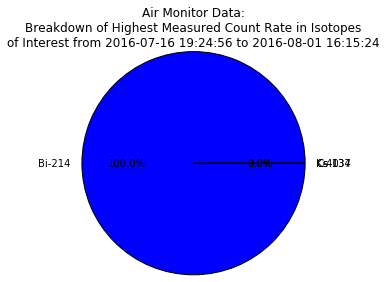

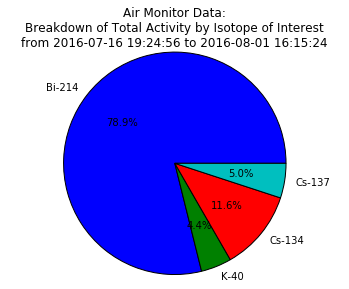

In [2]:
def pie_chart():
    tally = [0,0,0,0]
    for i in range(0,len(Bi214)-1):
        comparing_list = [Bi214[i],K40[i], Cs134[i], Cs137[i]]
        if max(comparing_list) == Bi214[i]:
            tally[0] += 1
        elif max(comparing_list) == K40[i]:
            tally[1] += 1
        elif max(comparing_list) == Cs134[i]:
            tally[2] += 1
        else:
            tally[3] += 1

    # plt.pie places the items counter-clockwise
    labels = "Bi-214", "K-40", "Cs-134", "Cs-137"
    total_counts = sum(tally)
    fracs = [tally[0]/total_counts, tally[1]/total_counts, 
            tally[2]/total_counts, tally[3]/total_counts]
    explode = (0,0,0,0)   # explode refers to "pulling out" certain items for exaggerated effect
    plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%') 
        # 'autopct='1.1f%%' displays percent value for each slice
    plt.axis('equal')
        # set the pie chart against a square axis, otherwise it won't be circular.
    plt.title('Air Monitor Data:\nBreakdown of Highest Measured Count Rate in Isotopes\nof Interest from %s to %s' %(timedata[0],timedata[-1]))
        # this title string demonstrates a line break (signified by \n after isotopes) and string interpolation (represented by %s).
    plt.show()
    
    # a more interesting example pie chart would breakdown total activity in each isotope:
    activity = [sum(Bi214), sum(K40), sum(Cs134), sum(Cs137)]
    labels = "Bi-214", "K-40", "Cs-134", "Cs-137"
    total_activity = sum(activity)
    
    fracs = [activity[0]/total_activity, activity[1]/total_activity, 
            activity[2]/total_activity, activity[3]/total_activity]
    explode = (0,0,0,0)   
    plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%') 
    plt.axis('equal')
    plt.title('Air Monitor Data:\nBreakdown of Total Activity by Isotope of Interest\nfrom %s to %s' %(timedata[0],timedata[-1]))
    plt.show()

pie_chart()

The following commands will create a  table with 4 rows, each containing an isotope (Bi-214, K-40, Cs-134, and Cs-137).  There will be 5 columns with the following information: isotope name, mean concentration, median concentration, max concentration measured, and time of occurrence:

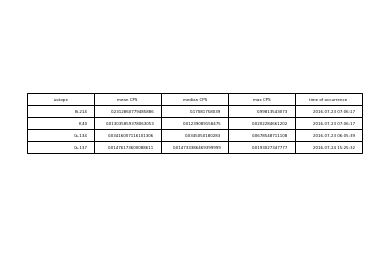

In [3]:
def table():
    RowLabel = ("Bi-214", "K-40", "Cs-134", "Cs-137")
    ColLabel = ("isotope", "mean CPS", "median CPS", "max CPS", "time of occurrence")    
    
    # The statistical meaning of mean and a computational method to obtain it are explored in a different module.
    # For this module, we will use the numpy function 'np.mean'
    mean_data = (np.mean(Bi214), np.mean(K40), np.mean(Cs134), np.mean(Cs137))
    
    # For median, we will use the numpy function 'np.median'
    median_data = (np.median(Bi214), np.median(K40), np.median(Cs134), np.median(Cs137))
    
    # Numpy also has a function to scan a list for the max value contained in that list!
    max_data = (np.max(Bi214), np.max(K40), np.max(Cs134), np.max(Cs137))
    
    # Each max CPS has a corresponding datetime component with the same index. I will use LIST.index(max(LIST)) 
    # to find these corresponding indices.  Note: this method's weakness is that  it only identifies the first occurrence of 
    # a maximum; if there the max occurs multiple times it will not acknowledge them.  Can you think/find a way to do this 
    # in a better way?
    time_data = (timedata[Bi214.index(np.max(Bi214))], timedata[K40.index(np.max(K40))], 
                 timedata[Cs134.index(np.max(Cs134))], timedata[Cs137.index(np.max(Cs137))])  
                # if you have trouble understanding the previous commands, make sure you comprehend each component and piece
                # their purpose together!
    
    
    data_array = np.vstack((RowLabel,mean_data,median_data, max_data,time_data)).T
        # vstack places the lists atop eachother and '.T' transposes the information so it'll appear as it should on the table.
    fig, ax = plt.subplots() 
    ax.axis('off')
        # By default, matplotlib will always plot against axes.  Therefore, if we want a table only, we turn the axis 'off'
    ax.table(cellText=data_array, colLabels=ColLabel, loc='center')
    plt.show()

table()